In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_TRIALS = 10000
EPS = 0.1 # epsilon value
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75] # win rates for bandits

In [3]:
class Bandit:
  def __init__(self, p):
    # p is the win rate
    self.p = p
    self.p_estimate = 0
    self.N = 0 # num of samples collected so far

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

In [6]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_j = np.argmax([b.p for b in bandits])
  print("optimal j:", optimal_j)

  for i in range(NUM_TRIALS):
    # use epsilon-greedy

    if np.random.random() < EPS:
      num_times_explored += 1
      j = np.random.randint(len(bandits))
    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])

    if j == optimal_j:
      num_optimal += 1

    x = bandits[j].pull()

    rewards[i] = x

    bandits[j].update(x)
  for b in bandits:
    print("mean estimate:", b.p_estimate)

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)
  print("num times selected optimal bandit:", num_optimal)

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

optimal j: 2
mean estimate: 0.22507122507122512
mean estimate: 0.46857142857142875
mean estimate: 0.7529841918485869
total reward earned: 7245.0
overall win rate: 0.7245
num_times_explored: 989
num_times_exploited: 9011
num times selected optimal bandit: 9299


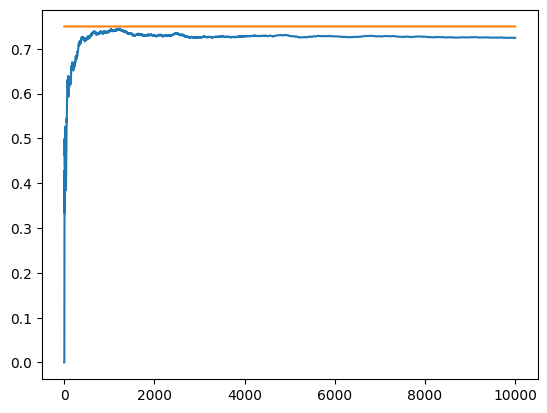

In [7]:
experiment()